In [13]:
#### 1. Вывести: кол-во наблюдений в датасете
#### 2. Вывести названия столбцов
#### 3. Определить самую частую позицию (item) в заказе 
#### 4. Построить гистрограмму частоты заказов по позициям (item )
#### 5. Измените тип переменной item_price c с помощью лямбды функции
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
#### 7. Средняя сумма заказа? (минимум 2 способа)
#### 8. Выведите среднее, минимальное и максимальное, медианное значения позиций в заказе
#### 9. Определить статистику заказов стейков, а также статистику заказов прожарки.
#### 10. Добавить новый столбец цен на каждую позицию в заказе в рублях.
#### 11. Сгруппировать заказы по входящим позициям в него. Отдельно сгруппировать по стейкам во всех видах прожарках.
#### 12. Определить цену по каждой позиции в отдельности. 

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

In [15]:
#### 1. Вывести: кол-во наблюдений в датасете
dataset.shape[0]

4622

In [16]:
#### 2. Вывести названия столбцов
dataset.columns.tolist()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

In [17]:
#### 3. Определить самую частую позицию (item) в заказе 
dataset.groupby('item_name')['quantity'].sum().idxmax()

'Chicken Bowl'

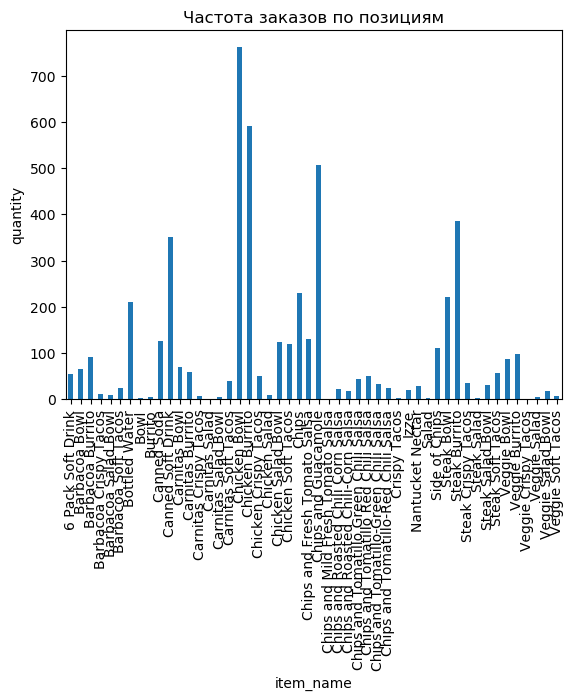

In [18]:
#### 4. Построить гистрограмму частоты заказов по позициям (item )
hist = dataset.groupby('item_name')['quantity'].sum().plot(kind='bar')
hist.set_ylabel('quantity')
plt.title('Частота заказов по позициям')
plt.show()

In [19]:
#### 5. Измените тип переменной item_price c с помощью лямбды функции
dataset.dtypes
dataset['item_price'] = dataset['item_price'].apply(lambda x: float(x[1:-1]))
dataset.dtypes

order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

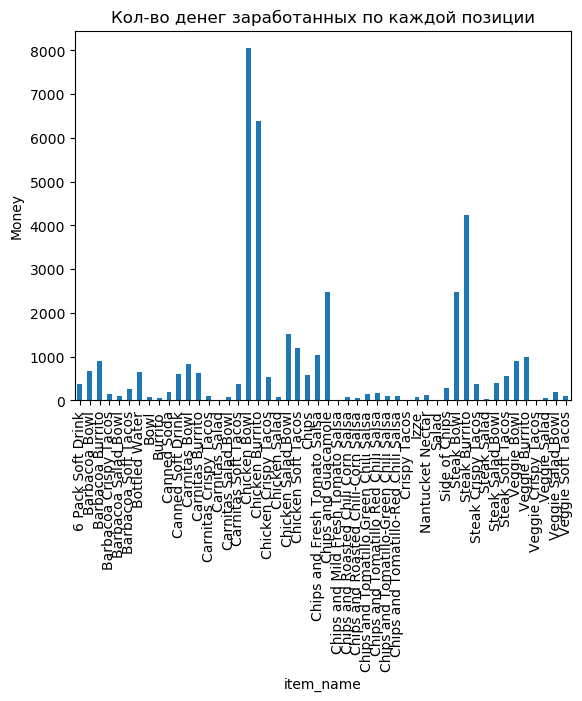

In [20]:
#### 6. Построить гистограмму кол-во денег заработанных по каждой позиции (item)
item_price = pd.to_numeric(dataset['item_price'])
quantity = pd.to_numeric(dataset['quantity'])
dataset['sum_price'] = quantity * item_price
dataset.groupby('item_name')['sum_price'].sum().plot(kind='bar')
plt.xlabel('item_name')
plt.ylabel('Money')
plt.title('Кол-во денег заработанных по каждой позиции')
plt.show()